<a href="https://colab.research.google.com/github/Jalicia-Harris/Predictions-of-Product-Sales/blob/main/Prediction_of_Product_Sales_jalicia_harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
##### Jalicia Harris

## Project Overview

## Load and Inspect Data

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load file, display column info, and preview rows
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

### 1. How many rows and columns?


In [ ]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 8523 rows, and 12 columns.


### 2. What are the datatypes of each variables?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Checking for Duplicates and Missing Values

In [ ]:
# Check and delete any duplicates
titanic = df.duplicated().sum()
print(f'There are {titanic} duplicates')

There are 0 duplicates


In [ ]:
# Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Identifying and Making Corrections


- The missing values in column 'Item_Weight' will be replaced with calculated mean.
- This missing values in the 'Outlet_Size' column will be replaced with value "Unknown"
- All other datatypes will remain as is.

In [ ]:
# Replace missing values in 'Item Weight' column with the median
missing_data = df['Item_Weight'].mean()
df['Item_Weight'].fillna(missing_data, inplace = True)

In [ ]:
# Replace missing values in 'Outlet_Size' column with value 'Unknown'
df['Outlet_Size'].fillna('Unknown', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Identify and Correct Any Inconsistencies

In [ ]:
# Find any inconsistent categories of data
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Standarize the values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
# Confirm results
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## Exploratory Data Analysis

### Examining Distributions of Various Sections Using Histograms

---



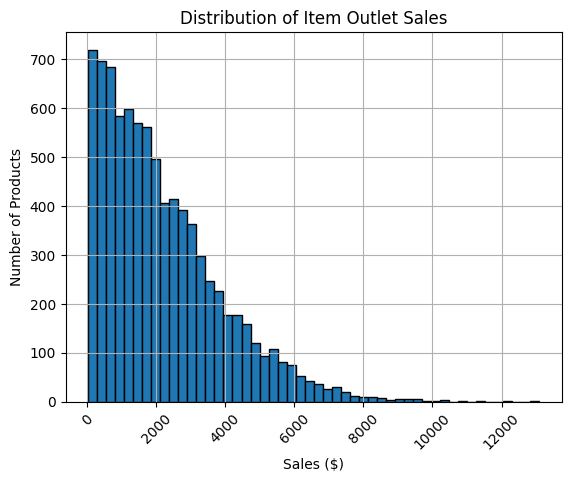

In [ ]:
# Create a histogram to view the distributions of various features in the dateset
ax = df['Item_Outlet_Sales'].hist(bins=50, edgecolor = 'black')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Sales ($)')
ax.set_ylabel('Number of Products');

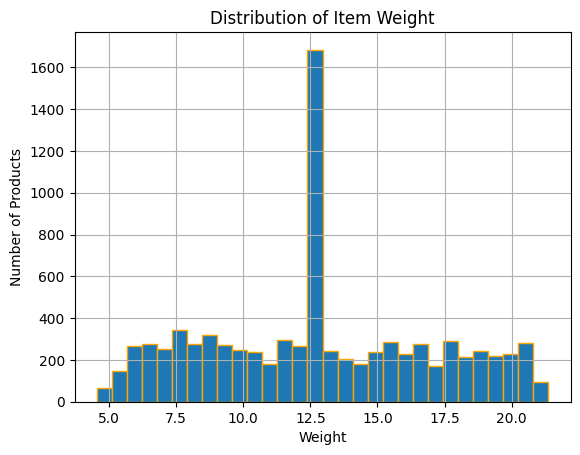

In [ ]:
ax = df['Item_Weight'].hist(bins=30, edgecolor = 'orange')
ax.set_title('Distribution of Item Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('Number of Products');

### Examine Statistical Summaries Using Boxplots

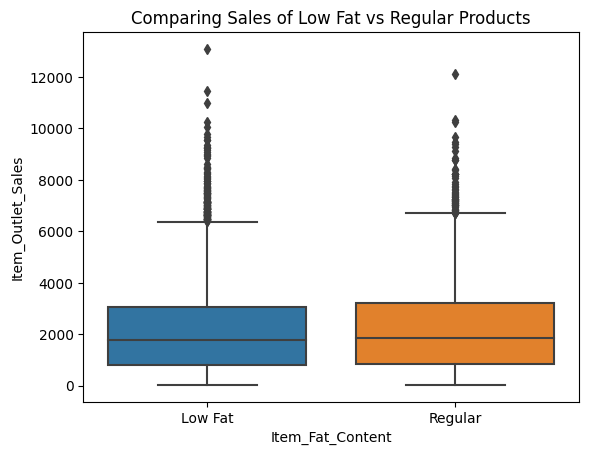

In [ ]:
# Create a Boxplot to view statistical summaries of various features in the dataset
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Sales of Low Fat vs Regular Products");

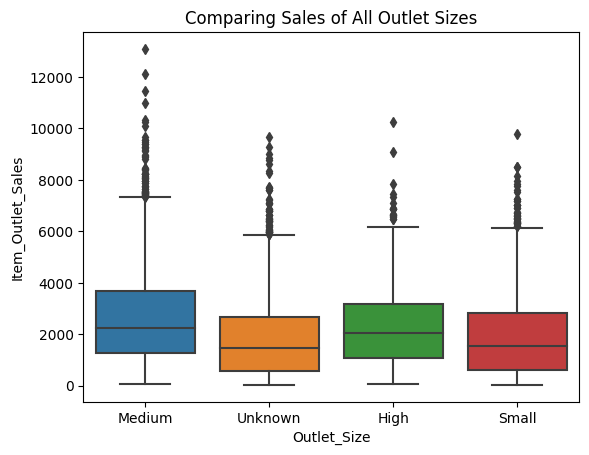

In [ ]:
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Sales of All Outlet Sizes");

### Examine the Correlation Between Various Sections Using Heatmaps

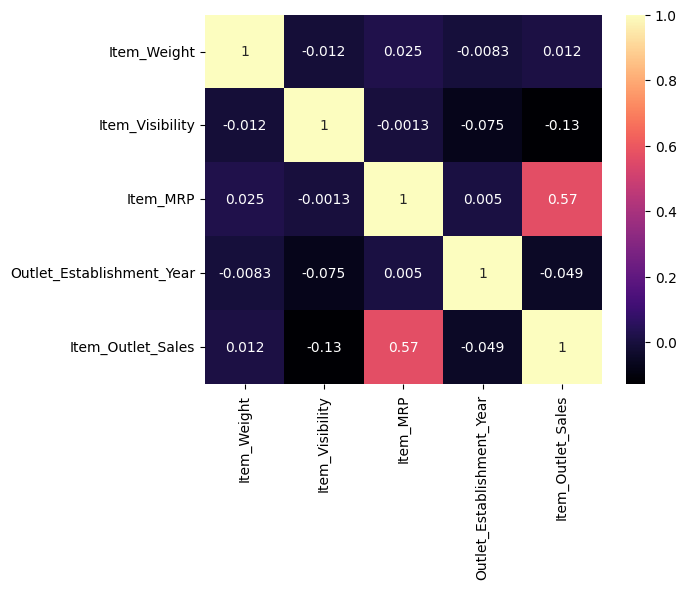

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'magma', annot=True);

## Explanatory Data Analysis

### Possible Questions to Answer:
##### 1. What outlet types have the highest sales?
##### 2. Which product types bring in the most profits?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 1. What outlet types have the highest sales?

In [ ]:
# Get the average for each outlet type
type_mean = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
type_mean

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

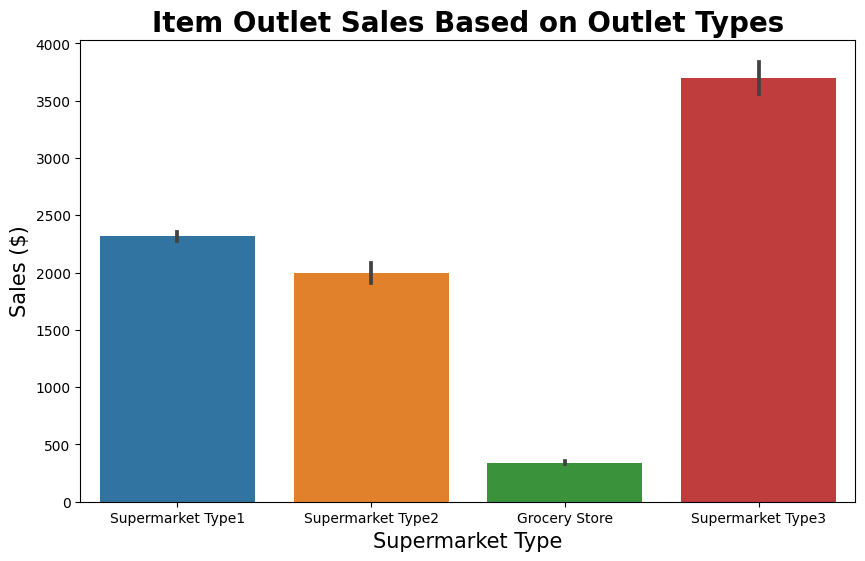

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
ax.set_title('Item Outlet Sales Based on Outlet Types', fontsize=20, fontweight='bold');
ax.set_xlabel('Supermarket Type', fontsize=15)
ax.set_ylabel('Sales ($)', fontsize=15);

- The bar graph above shows that Supermarket Type 3 has the highest amount of sales.

### What product types bring in the most profits?

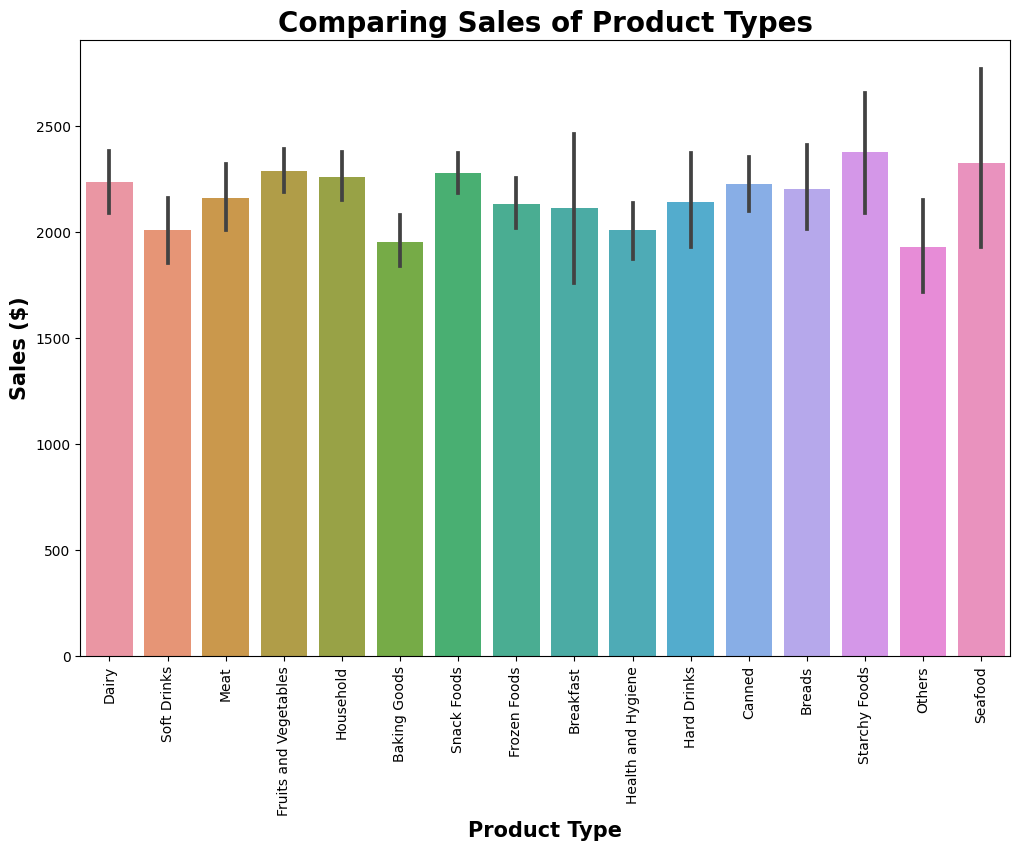

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Comparing Sales of Product Types", fontsize=20, fontweight='bold');
ax.set_xlabel('Product Type', fontsize=15, fontweight='bold')
ax.set_ylabel('Sales ($)', fontsize=15, fontweight='bold');

- The bar graph above shows that starchy foods has the highest profits.

## Processing for Machine Learning

### Import Libraries

In [2]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

### Load Data

In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions_2023.csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Explore the Data

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Performing Preprocessing Steps

In [5]:
# Checking for Duplicates
df2.duplicated().sum()
# There are no duplicates

0

In [6]:
# Check for missing values
print(df2.isna().sum().sum(), 'missing values')

3873 missing values


In [7]:
# Check which columns contain the missing values
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### A SimpleImputer will be used to handle the missing values

### Identify X and y and Perform Train Test Split

In [18]:
# Split
X = df2.drop('Item_Outlet_Sales', axis=1)
y = df2['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Instantiate Column Selectors

In [11]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

### Instantiate Transformers

In [12]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### Instantiate Pipelines

In [13]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [14]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### Instantiate ColumnTransformer

In [15]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbeca8e9c90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbeca8ea410>)])

### Transformer Data

In [16]:
# Fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbeca8e9c90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbeca8ea410>)])

In [17]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)